# Easy Land Cover Classification: Poland, Central Europe Woodlands

### Motivation

I've always wanted to learn Pytorch. Despite how much ML I read and try to do, it's surprising that I still haven't properly learned Pytorch yet. By that, I mean that I haven't used Pytorch to do a significant project yet. 

If you think about Pytorch, the first thing that comes to mind is a classic computer vision task. But what I want to do is not just any computer vision task. I want to do a relatively easy one! I'm half kidding. I only started to do Pytorch, so for my very first task I want to do something relatively straightforward, but not so straightforward that it's trivial. Furthermore, because I'm an environmental science ethusiast, I want it to be related to the earth. So I decide that I'll do land cover classification, a classic problem in environmental data science. 

When I was searching for a good land cover classification dataset to work with, kaggle had a list of different options. They vary in data format and other ways, the one that influence my decision the most is whether they have labels for validation and test data too and if the labels are understandable and clean. Lastly, I chose this dataset over others because it's recent (created 7 months ago) and have few target classes (4 different ones. Some of the other datasets have over a dozen!). 

Kaggle might not be the best place to find realistic dataset, but it's sufficient for the purpose of this project, which is to learn! And it's a place where I can find a good dataset relatively quickly.

### A Brief Description of the Dataset

The dataset takes us to the woodlands in Poland, Central Europe. The images are readily converted to png format and train, val(idation) and test splits. Each image is paired with the image label, which is another image. The images and labels are 512 x 512 x 3 matrices where the dimensions are Height x Width x Channels (RGB). The labels also have 3 channels, where we take notes to check whether they're all the same and can be squashed later when we load and process the labels. 

Each pixels can be building (1), woodland (2), water (3), or road (4). The class balance are 1.85 km2 of buildings, 72.02 km2 of woodlands, 13.15 km2 of water, 3.5 km2 of roads, with a total area of 216.27 km2. Raw images in tiff are provided if we need them.

### Let's start typing in some code: importing libraries!
- PIL - to load and process images.  
- numpy

In [2]:
from PIL import Image
import numpy as np

### Data exploration

We take a look at `M-33-7-A-d-2-3_18_m.png` in training data labels. Turns out some of the pixels are labeled as 0. 

In [3]:
file_path = "data/labels/train/M-33-7-A-d-2-3_18_m.png"
im = Image.open(file_path)
im_array = np.array(im)

In [13]:
def get_unique_value_counts(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    value_counts_dict = dict(zip(unique_values, counts))
    return value_counts_dict

get_unique_value_counts(im_array)

{0: 23331, 2: 744618, 4: 18483}

In [5]:
im_array.shape

(512, 512, 3)

In [26]:
im_arr_zeros = np.where(im_array != 0, 255, 0)
im_arr_zeros[0], im_arr_zeros.shape

(array([[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]),
 (512, 512, 3))

In [20]:
get_unique_value_counts(im_arr_zeros)

{0: 23331, 255: 763101}

In [25]:
im_arr_zeros.shape

(512, 512, 3)

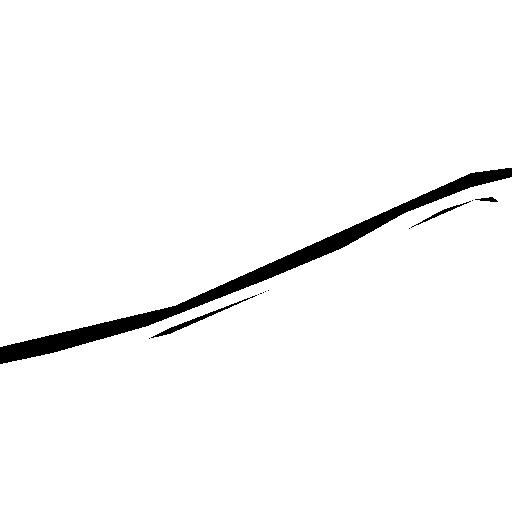

In [28]:
im_zeros = Image.fromarray(im_arr_zeros.astype(np.uint8))
im_zeros

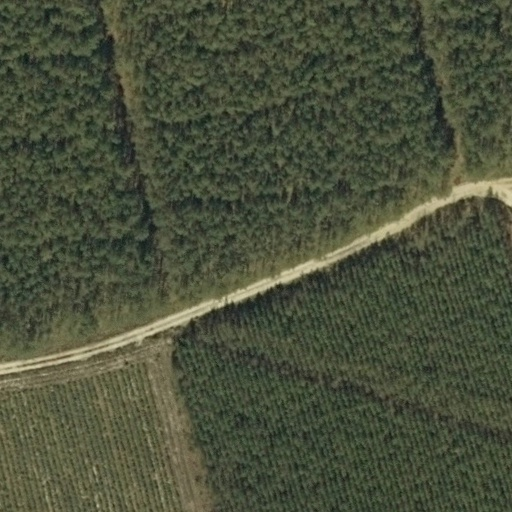

In [31]:
file_path = "data/images/train/M-33-7-A-d-2-3_18.jpg"
im_original = Image.open(file_path)
im_original

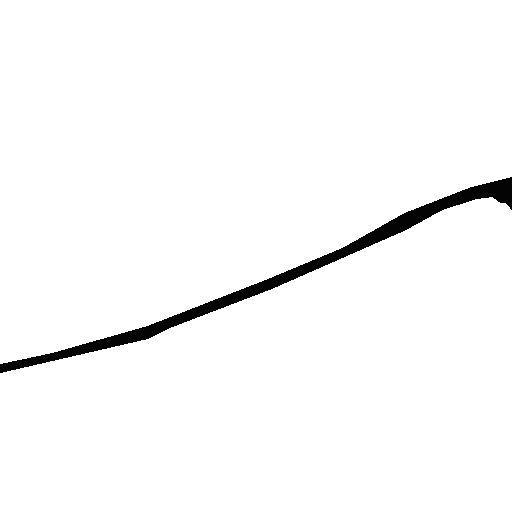

In [32]:
im_arr_fours = np.where(im_array != 4, 255, 4)
im_fours = Image.fromarray(im_arr_fours.astype(np.uint8))
im_fours

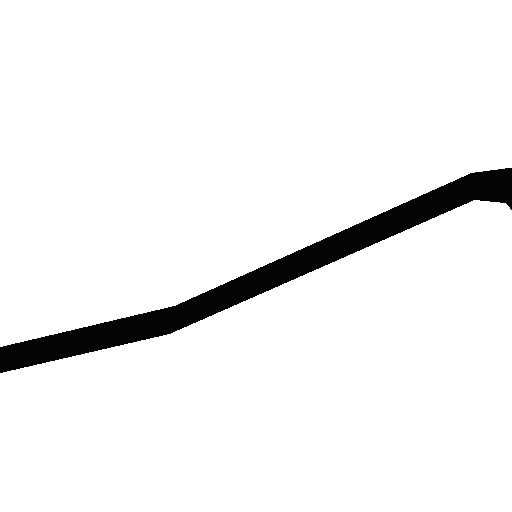

In [40]:
im_arr_mask = np.where(np.isin(im_array, [0, 4]), 4, 255)
im_masked = Image.fromarray(im_arr_mask.astype(np.uint8))
im_masked